In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


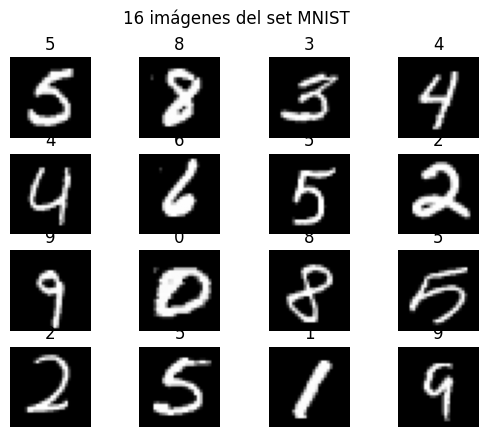

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [ ]:
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

nclasses = 10
Y_train = to_categorical(y_train, nclasses)
Y_test = to_categorical(y_test, nclasses)

In [ ]:
np.random.seed(1)

input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

In [ ]:
from keras.models import Sequential

modelo = Sequential()

In [ ]:
from keras.layers import Dense

modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,935 (46.62 KB)

 Trainable params: 11,935 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import SGD

# Use learning_rate instead of lr
sgd = SGD(learning_rate=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
num_epochs = 50

